<h1>DM_BD_Analysis</h1>

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

<h2>Daten aus Twitter</h2>

<h3>Authentifizierung</h3>

In [2]:
TWITTER_API_KEY='TWITTER_API_KEY'
TWITTER_API_KEY_SECRET='TWITTER_API_KEY_SECRET'
TWITTER_BEARER_TOKEN='TWITTER_BEARER_TOKEN'
TWITTER_ACCESS_TOKEN='TWITTER_ACCESS_TOKEN'
TWITTER_ACCESS_TOKEN_SECRET='TWITTER_ACCESS_TOKEN_SECRET'


twitterParams = {}
twitterfile = open("secrets/twitterParams.txt")
for line in twitterfile:
    keyValue  = line.strip().split("=")
    twitterParams[keyValue[0].strip()] = keyValue[1].strip()


<h3>Nutzen der Tweepy Bibliothek</h3>

In [3]:
client = tweepy.Client(bearer_token=twitterParams[TWITTER_BEARER_TOKEN])

tweet_count = client.get_recent_tweets_count(query='#BTC',granularity='day')


<h3>Preprocessing</h3>

In [4]:
df_btc_tweet_count = pd.DataFrame(tweet_count.data)
df_btc_tweet_count['start']=df_btc_tweet_count['start'].apply(lambda x: x[5:10])


<h3>Visualisierung</h3>

Text(0.5, 0.98, 'Bitcoin-Tweets')

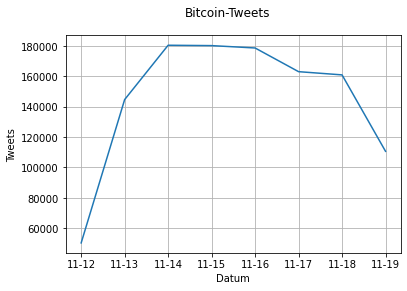

In [5]:
names = df_btc_tweet_count['start']
values = df_btc_tweet_count['tweet_count']

fig, ax = plt.subplots()
ax.plot(names, values)
ax.set_xlabel('Datum')
ax.set_ylabel('Tweets')
ax.grid(True)
fig.suptitle('Bitcoin-Tweets')